## `A <-> B` , downregulated by the "shunt" (coupled reaction) `A <-> S`
### _Kinetic_ advantage (downregulation in early phase) vs. _Thermodynamic_ advantage (long-term downregulation) 

**[Scenario 1](#down_regulate_1_scenario_1)** : No downregulation on `A <-> B `

**[Scenario 2](#down_regulate_1_scenario_2)** : The shunt (`A <-> S`) has a *kinetic* advantage but *thermodynamic* DIS-advantage compared to `A <-> B `  
(i.e. `A <-> S` is fast, but energetically unfavored) 

**[Scenario 3](#down_regulate_1_scenario_3)** : The shunt (`A <-> S`) is has a *kinetic* DIS-advantage but a *thermodynamic* advantage compared to `A <-> B`     
(i.e. `A <-> S` is slow, but energetically favored)  

All reactions are 1st order, mostly forward.  Taken to equilibrium.

LAST REVISED: June 23, 2024 (using v. 1.0 beta36)

## Bathtub analogy:
A is initially full, while B and S are empty.  
If the "shunt" S is present, scenario 2 corresponds to a large pipe and a small elevation change...  
while scenario 3 corresponds to a narrow pipe and a large elevation change.

![Downregulated by shunt](../../docs/down_regulate_1.png)

In [1]:
import set_path      # Importing this module will add the project's home directory to sys.path

Added 'D:\Docs\- MY CODE\BioSimulations\life123-Win7' to sys.path


In [2]:
from experiments.get_notebook_info import get_notebook_basename

from life123 import ChemData as chem
from life123 import UniformCompartment

import plotly.express as px
from life123 import GraphicLog

In [3]:
# Initialize the HTML logging (for the graphics)
log_file = get_notebook_basename() + ".log.htm"    # Use the notebook base filename for the log file

# Set up the use of some specified graphic (Vue) components
GraphicLog.config(filename=log_file,
                  components=["vue_cytoscape_2"],
                  extra_js="https://cdnjs.cloudflare.com/ajax/libs/cytoscape/3.21.2/cytoscape.umd.js")

-> Output will be LOGGED into the file 'down_regulate_1.log.htm'


# <a name="down_regulate_1_scenario_1"></a>  Scenario 1: A <-> B in the absence of the 2nd reaction

### Initialize the System
Specify the chemicals and the reaction

In [4]:
# Specify the chemicals
chem_data = chem(names=["A", "B"])

# Reaction A <-> B
chem_data.add_reaction(reactants=["A"], products=["B"],
                       forward_rate=30., reverse_rate=5.)

chem_data.describe_reactions()

Number of reactions: 1 (at temp. 25 C)
0: A <-> B  (kF = 30 / kR = 5 / delta_G = -4,441.7 / K = 6) | 1st order in all reactants & products
Set of chemicals involved in the above reactions: {'A', 'B'}


### Set the initial concentrations of all the chemicals

In [5]:
dynamics = UniformCompartment(chem_data=chem_data, preset="fast")
dynamics.set_conc(conc={"A": 50.}, snapshot=True)
dynamics.describe_state()

SYSTEM STATE at Time t = 0:
2 species:
  Species 0 (A). Conc: 50.0
  Species 1 (B). Conc: 0.0
Set of chemicals involved in reactions: {'A', 'B'}


### Run the reaction

In [6]:
dynamics.set_diagnostics()          # To save diagnostic information about the call to single_compartment_react()

# The changes of concentrations vary very rapidly early on; automated variable timesteps will take care of that
dynamics.single_compartment_react(initial_step=0.001, duration=0.3,
                                  snapshots={"initial_caption": "1st reaction step",
                                             "final_caption": "last reaction step"},
                                  variable_steps=True)

37 total step(s) taken
Number of step re-do's because of negative concentrations: 0
Number of step re-do's because of elective soft aborts: 0
Norm usage: {'norm_A': 22, 'norm_B': 17, 'norm_C': 16, 'norm_D': 16}


In [7]:
dynamics.get_history()

SYSTEM TIME          A          B             caption
0      0.000000  50.000000   0.000000   Initialized state
1      0.001000  48.500000   1.500000   1st reaction step
2      0.002000  47.052500   2.947500                    
3      0.002800  45.935030   4.064970                    
4      0.003600  44.848849   5.151151                    
5      0.004400  43.793081   6.206919                    
6      0.005200  42.766875   7.233125                    
7      0.006000  41.769403   8.230597                    
8      0.007200  40.315088   9.684912                    
9      0.008400  38.921854  11.078146                    
10     0.009600  37.587136  12.412864                    
11     0.010800  36.308476  13.691524                    
12     0.012000  35.083520  14.916480                    
13     0.013800  33.323259  16.676741                    
14     0.015240  32.003766  17.996234                    
15     0.016680  30.750777  19.249223                    
16     0.018840  28.966018  21.033982                    
17     0.020568  27.646153  22.353847                    
18     0.022296  26.406114  23.593886                    
19     0.024888  24.658551  25.341449                    
20     0.026962  23.387332  26.612668                    
21     0.029035  22.208373  27.791627                    
22     0.032146  20.568281  29.431719                    
23     0.034634  19.399045  30.600955                    
24     0.038366  17.797935  32.202065                    
25     0.041352  16.684379  33.315621                    
26     0.045831  15.188610  34.811390                    
27     0.050310  13.927325  36.072675                    
28     0.057029  12.331983  37.668017                    
29     0.062404  11.355820  38.644180                    
30     0.070466  10.167025  39.832975                    
31     0.082559   8.887006  41.112994                    
32     0.094652   8.148772  41.851228                    
33     0.112792   7.510122  42.489878                    
34     0.140002   7.160360  42.839640                    
35     0.180816   7.135357  42.864643                    
36     0.242039   7.151428  42.848572                    
37     0.333872   7.123879  42.876121  last reaction step

In [8]:
dynamics.explain_time_advance()

From time 0 to 0.002, in 2 steps of 0.001
From time 0.002 to 0.006, in 5 steps of 0.0008
From time 0.006 to 0.012, in 5 steps of 0.0012
From time 0.012 to 0.0138, in 1 step of 0.0018
From time 0.0138 to 0.01668, in 2 steps of 0.00144
From time 0.01668 to 0.01884, in 1 step of 0.00216
From time 0.01884 to 0.0223, in 2 steps of 0.00173
From time 0.0223 to 0.02489, in 1 step of 0.00259
From time 0.02489 to 0.02904, in 2 steps of 0.00207
From time 0.02904 to 0.03215, in 1 step of 0.00311
From time 0.03215 to 0.03463, in 1 step of 0.00249
From time 0.03463 to 0.03837, in 1 step of 0.00373
From time 0.03837 to 0.04135, in 1 step of 0.00299
From time 0.04135 to 0.05031, in 2 steps of 0.00448
From time 0.05031 to 0.05703, in 1 step of 0.00672
From time 0.05703 to 0.0624, in 1 step of 0.00537
From time 0.0624 to 0.07047, in 1 step of 0.00806
From time 0.07047 to 0.09465, in 2 steps of 0.0121
From time 0.09465 to 0.1128, in 1 step of 0.0181
From time 0.1128 to 0.14, in 1 step of 0.0272
From time

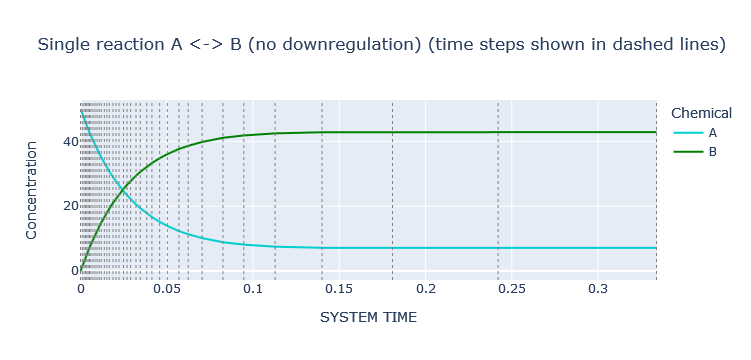

In [9]:
dynamics.plot_history(colors=["darkturquoise", "green"], title="Single reaction A <-> B (no downregulation)",
                      show_intervals=True)

#### Notice the intersection at the exact midpoint of the 2 initial concentrations (50 and 0):

In [10]:
dynamics.curve_intersect('A', 'B', t_start=0, t_end=0.1)

(0.024381560069949713, 25.0)

In [11]:
# Verify that all the reactions have reached equilibrium
dynamics.is_in_equilibrium()

0: A <-> B
Final concentrations: [A] = 7.124 ; [B] = 42.88
1. Ratio of reactant/product concentrations, adjusted for reaction orders: 6.01865
    Formula used:  [B] / [A]
2. Ratio of forward/reverse reaction rates: 6
Discrepancy between the two values: 0.3108 %
Reaction IS in equilibrium (within 1% tolerance)



True

# <a name="down_regulate_1_scenario_2"></a>  Scenario 2 - downregulated by shunt: 
### kinetically fast,   
### but with thermodynamical dis-advantage (i.e. energetically un-favored)

In [12]:
# Register the new chemical ("S")
chem_data.add_chemical("S")

# Add the reaction A <-> S (fast shunt, poor thermodynical energetic advantage)
chem_data.add_reaction(reactants=["A"], products=["S"],
                       forward_rate=150., reverse_rate=100.) 

chem_data.describe_reactions()

Number of reactions: 2 (at temp. 25 C)
0: A <-> B  (kF = 30 / kR = 5 / delta_G = -4,441.7 / K = 6) | 1st order in all reactants & products
1: A <-> S  (kF = 150 / kR = 100 / delta_G = -1,005.1 / K = 1.5) | 1st order in all reactants & products
Set of chemicals involved in the above reactions: {'S', 'A', 'B'}


In [13]:
# Send a plot of the network of reactions to the HTML log file
chem_data.plot_reaction_network("vue_cytoscape_2")

[GRAPHIC ELEMENT SENT TO LOG FILE `down_regulate_1.log.htm`]


In [14]:
dynamics = UniformCompartment(chem_data=chem_data, preset="mid")   # Notice we're over-writing the earlier "dynamics" object
dynamics.set_conc(conc={"A": 50.}, snapshot=True)
dynamics.describe_state()

SYSTEM STATE at Time t = 0:
3 species:
  Species 0 (A). Conc: 50.0
  Species 1 (B). Conc: 0.0
  Species 2 (S). Conc: 0.0
Set of chemicals involved in reactions: {'S', 'A', 'B'}


### Run the reaction

In [15]:
dynamics.set_diagnostics()         # To save diagnostic information about the call to single_compartment_react()

# The changes of concentrations vary very rapidly early on; automated variable timesteps will take care of that
dynamics.single_compartment_react(initial_step=0.001, duration=0.3,
                                  snapshots={"initial_caption": "1st reaction step",
                                             "final_caption": "last reaction step"},
                                  variable_steps=True)

57 total step(s) taken
Number of step re-do's because of negative concentrations: 0
Number of step re-do's because of elective soft aborts: 2
Norm usage: {'norm_A': 38, 'norm_B': 37, 'norm_C': 36, 'norm_D': 36}


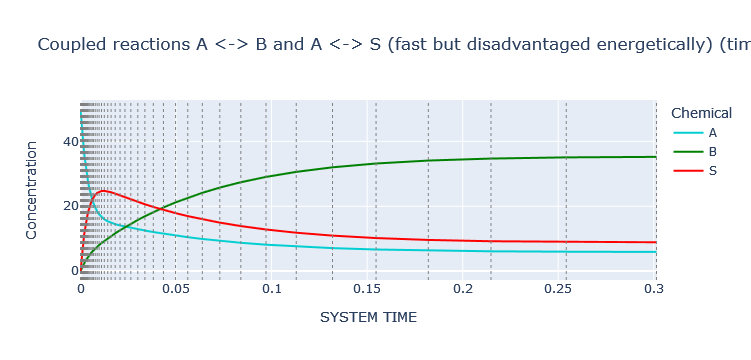

In [16]:
dynamics.plot_history(colors=["darkturquoise", "green", "red"],
                      title="Coupled reactions A <-> B and A <-> S (fast but disadvantaged energetically)",
                      show_intervals=True)

### Notice how the "alternate (shunt) path" of the reaction, i.e. S (red)   
### has a FAST START (fast kinetics),
### but EVENTUALLY PETERS OUT (energy dis-advantage)

In [17]:
# Verify that all the reactions have reached equilibrium
dynamics.is_in_equilibrium()

0: A <-> B
Final concentrations: [A] = 5.887 ; [B] = 35.24
1. Ratio of reactant/product concentrations, adjusted for reaction orders: 5.98644
    Formula used:  [B] / [A]
2. Ratio of forward/reverse reaction rates: 6
Discrepancy between the two values: 0.226 %
Reaction IS in equilibrium (within 1% tolerance)

1: A <-> S
Final concentrations: [A] = 5.887 ; [S] = 8.873
1. Ratio of reactant/product concentrations, adjusted for reaction orders: 1.50724
    Formula used:  [S] / [A]
2. Ratio of forward/reverse reaction rates: 1.5
Discrepancy between the two values: 0.4824 %
Reaction IS in equilibrium (within 1% tolerance)



True

# <a name="down_regulate_1_scenario_3"></a> Scenario 3 - downregulated by shunt:   
### kinetically slow,   
### but with thermodynamical advantage (i.e. energetically favored)

In [18]:
# Specify the chemicals  (notice that we're starting with new objects)
new_chem_data = chem(names=["A", "B", "S"])

# Reaction A <-> B (as before)
new_chem_data.add_reaction(reactants=["A"], products=["B"],
                       forward_rate=30., reverse_rate=5.) 

# Reaction A <-> S (slow shunt, excellent thermodynamical energetic advantage)
new_chem_data.add_reaction(reactants=["A"], products=["S"],
                       forward_rate=3., reverse_rate=0.1)

new_chem_data.describe_reactions()

Number of reactions: 2 (at temp. 25 C)
0: A <-> B  (kF = 30 / kR = 5 / delta_G = -4,441.7 / K = 6) | 1st order in all reactants & products
1: A <-> S  (kF = 3 / kR = 0.1 / delta_G = -8,431.4 / K = 30) | 1st order in all reactants & products
Set of chemicals involved in the above reactions: {'S', 'A', 'B'}


In [19]:
dynamics = UniformCompartment(chem_data=new_chem_data, preset="small_rel_change")
dynamics.set_conc(conc={"A": 50.}, snapshot=True)
dynamics.describe_state()

SYSTEM STATE at Time t = 0:
3 species:
  Species 0 (A). Conc: 50.0
  Species 1 (B). Conc: 0.0
  Species 2 (S). Conc: 0.0
Set of chemicals involved in reactions: {'S', 'A', 'B'}


### Run the reaction

In [20]:
dynamics.set_diagnostics()       # To save diagnostic information about the call to single_compartment_react()

# The changes of concentrations vary very rapidly early on; automated variable timesteps will take care of that
dynamics.single_compartment_react(initial_step=0.005, duration=7.0,
                                  snapshots={"initial_caption": "1st reaction step",
                                             "final_caption": "last reaction step"},
                                  variable_steps=True)

454 total step(s) taken
Number of step re-do's because of negative concentrations: 0
Number of step re-do's because of elective soft aborts: 1
Norm usage: {'norm_A': 17, 'norm_B': 17, 'norm_C': 16, 'norm_D': 16}


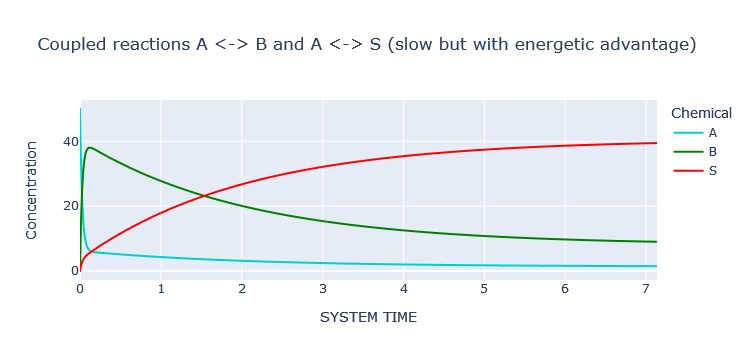

In [21]:
dynamics.plot_history(colors=["darkturquoise", "green", "red"],
                      title="Coupled reactions A <-> B and A <-> S (slow but with energetic advantage)")

### Notice how the "alternate (shunt) path" of the reaction, i.e. S (red)   
### has a SLOW START (slow kinetics),
### but EVENTUALLY DOMINATES (energy advantage)

In [22]:
dynamics.explain_time_advance()

From time 0 to 0.0025, in 2 steps of 0.00125
From time 0.0025 to 0.03281, in 97 steps of 0.000313
From time 0.03281 to 0.05859, in 55 steps of 0.000469
From time 0.05859 to 0.07617, in 25 steps of 0.000703
From time 0.07617 to 0.09199, in 15 steps of 0.00105
From time 0.09199 to 0.1062, in 9 steps of 0.00158
From time 0.1062 to 0.1205, in 6 steps of 0.00237
From time 0.1205 to 0.2237, in 29 steps of 0.00356
From time 0.2237 to 0.3999, in 33 steps of 0.00534
From time 0.3999 to 0.6402, in 30 steps of 0.00801
From time 0.6402 to 0.9525, in 26 steps of 0.012
From time 0.9525 to 1.349, in 22 steps of 0.018
From time 1.349 to 1.998, in 24 steps of 0.027
From time 1.998 to 3.66, in 41 steps of 0.0405
From time 3.66 to 4.876, in 20 steps of 0.0608
From time 4.876 to 5.971, in 12 steps of 0.0912
From time 5.971 to 6.929, in 7 steps of 0.137
From time 6.929 to 7.134, in 1 step of 0.205
(454 steps total)


### Check the final equilibrium

In [23]:
# Verify that all the reactions are close to equilibrium
dynamics.is_in_equilibrium(tolerance=12)

0: A <-> B
Final concentrations: [A] = 1.488 ; [B] = 9.019
1. Ratio of reactant/product concentrations, adjusted for reaction orders: 6.06134
    Formula used:  [B] / [A]
2. Ratio of forward/reverse reaction rates: 6
Discrepancy between the two values: 1.022 %
Reaction IS in equilibrium (within 12% tolerance)

1: A <-> S
Final concentrations: [A] = 1.488 ; [S] = 39.49
1. Ratio of reactant/product concentrations, adjusted for reaction orders: 26.5412
    Formula used:  [S] / [A]
2. Ratio of forward/reverse reaction rates: 30
Discrepancy between the two values: 11.53 %
Reaction IS in equilibrium (within 12% tolerance)



True

### Please note the **much-longer** timescale from the earlier plots
If we look at early time interval, this is what it looks like:

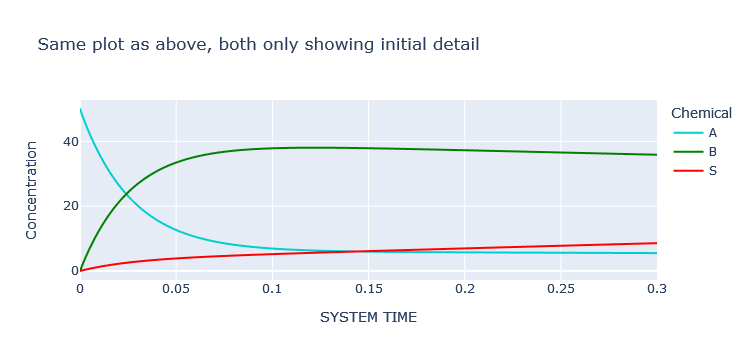

In [24]:
dynamics.plot_history(colors=["darkturquoise", "green", "red"],
                      title="Same plot as above, both only showing initial detail", xrange=[0, 0.3])

In [25]:
# Look at where the curves intersect
dynamics.curve_intersect("A", "B", t_start=0, t_end=0.1)

(0.02405919499545674, 23.73396682504195)

In [26]:
dynamics.curve_intersect("A", "S", t_start=0.1, t_end=0.2)

(0.14412951669101942, 6.026379520544665)